<a href="https://colab.research.google.com/github/joaopaulolndev/keras-projects/blob/master/FashionMnist/FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 18.3MB/s 


In [0]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns

In [0]:
# https://drive.google.com/open?id=13q077jXhu_c4ZES4ESkv_Vmdy3MoEKA0
# Carrega arquivo de entrada 
file_entrada = drive.CreateFile({'id':'13q077jXhu_c4ZES4ESkv_Vmdy3MoEKA0'}) 
file_entrada.GetContentFile('fashion-mnist_train.csv')  
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep=',')

In [0]:
# https://drive.google.com/open?id=1umRUTzIEfIsBmpRg9ciBzGgSyLHbmvSc
# Carrega arquivo de entrada 
file_entrada = drive.CreateFile({'id':'1umRUTzIEfIsBmpRg9ciBzGgSyLHbmvSc'}) 
file_entrada.GetContentFile('fashion-mnist_test.csv')  
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep=',')

In [0]:
training = np.array(fashion_train_df, dtype='float32')
testing  = np.array(fashion_test_df, dtype='float32')

In [0]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

9.0

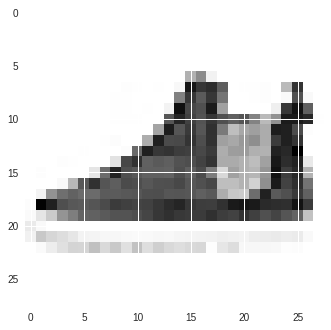

In [7]:
import random
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

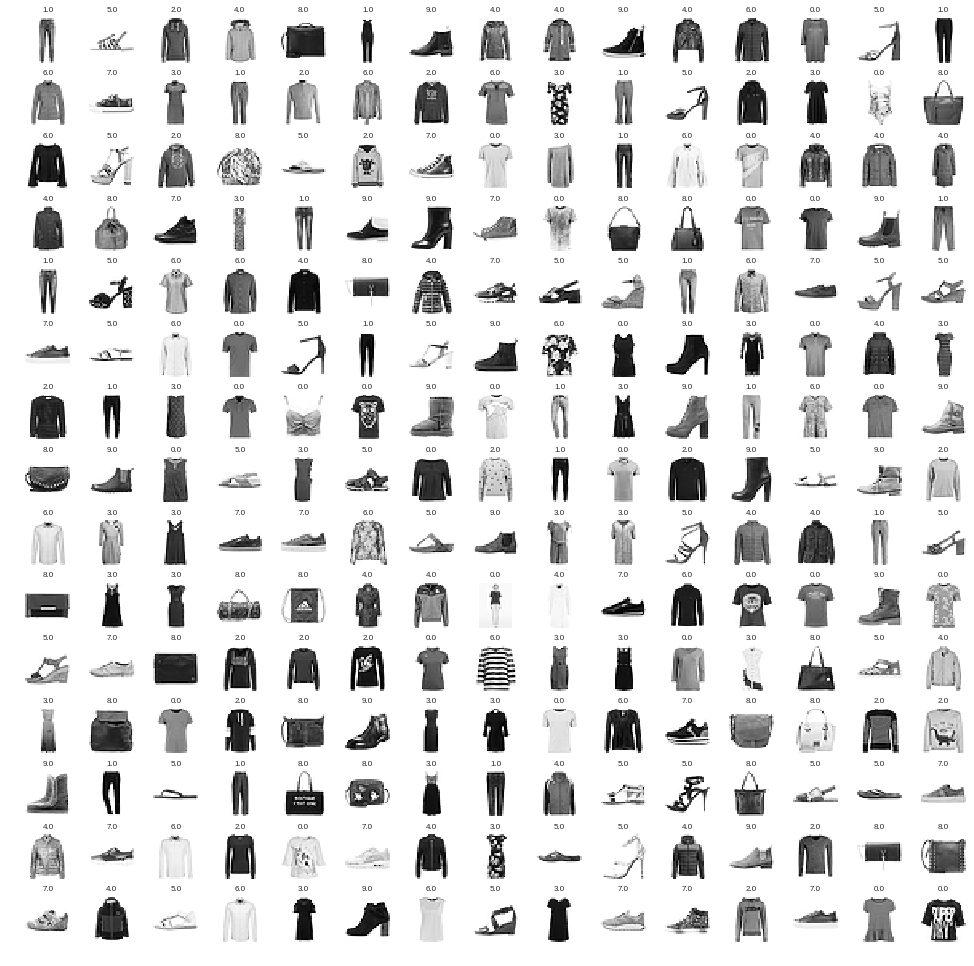

In [8]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
        

In [0]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345) 

In [0]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [13]:
X_train.shape

(48000, 28, 28, 1)

In [14]:
X_test.shape

(10000, 28, 28, 1)

In [15]:
X_validate.shape

(12000, 28, 28, 1)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [17]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, 3, 3, input_shape =(28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation='relu'))
cnn_model.add(Dense(output_dim = 10, activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [0]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [19]:
cnn_model.fit( X_train, y_train, batch_size= 512, nb_epoch= 20, verbose= 1, validation_data = (X_validate, y_validate))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 28s 573us/step - loss: 0.8489 - acc: 0.7091 - val_loss: 0.4857 - val_acc: 0.8271
Epoch 2/20
48000/48000 [==============================] - 27s 561us/step - loss: 0.4455 - acc: 0.8450 - val_loss: 0.4017 - val_acc: 0.8621
Epoch 3/20
48000/48000 [==============================] - 27s 557us/step - loss: 0.3944 - acc: 0.8606 - val_loss: 0.3835 - val_acc: 0.8671
Epoch 4/20
48000/48000 [==============================] - 27s 560us/step - loss: 0.3681 - acc: 0.8688 - val_loss: 0.3778 - val_acc: 0.8648
Epoch 5/20
48000/48000 [==============================] - 27s 562us/step - loss: 0.3463 - acc: 0.8782 - val_loss: 0.3400 - val_acc: 0.8813
Epoch 6/20
48000/48000 [==============================] - 27s 569us/step - loss: 0.3328 - acc: 0.8837 - val_loss: 0.3380 - val_acc: 0.8823
Epoch 7/20
48000/48000 [==============================] - 27s 557us/step - loss: 0.3183 - acc: 0.8872 - val_loss: 0.

In [20]:
evalution = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evalution[1]))

10000/10000 [==============================] - 2s 204us/step
Test Accuracy : 0.908


In [0]:
predicted_classes = cnn_model.predict_classes(X_test)

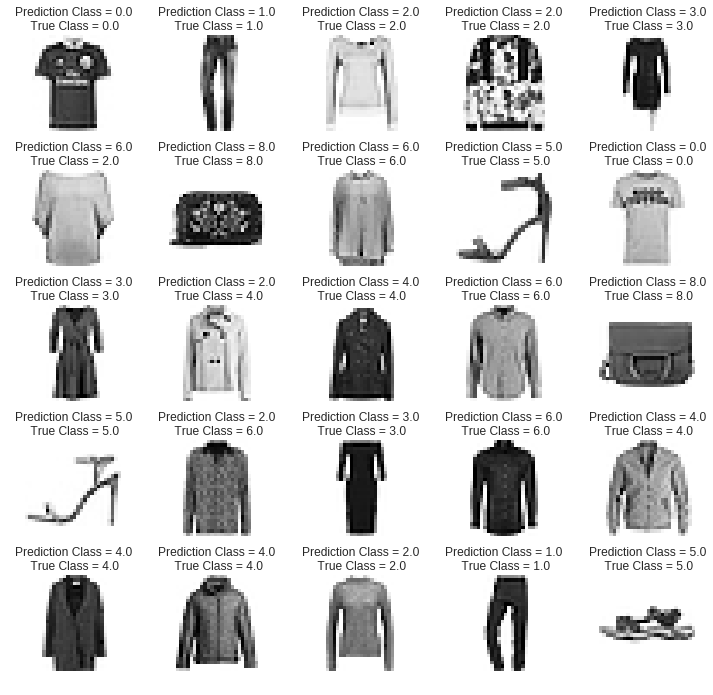

In [22]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

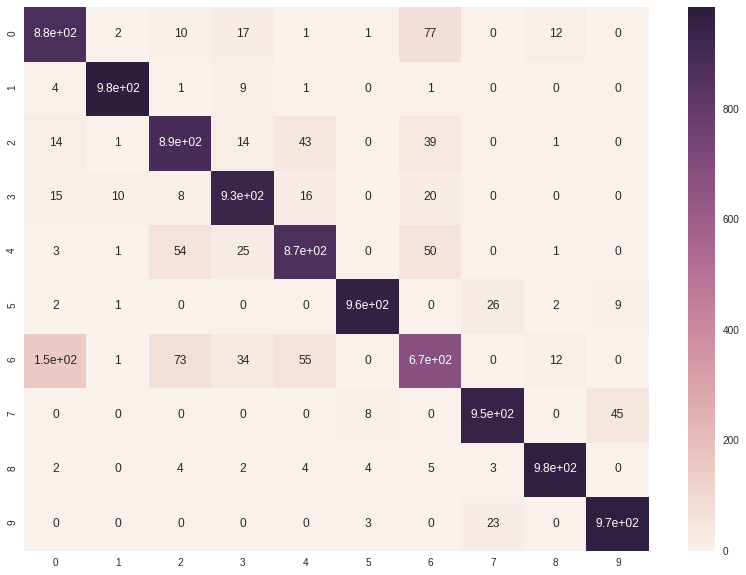

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [24]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.88      0.85      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.86      0.89      0.87      1000
     Class 3       0.90      0.93      0.92      1000
     Class 4       0.88      0.87      0.87      1000
     Class 5       0.98      0.96      0.97      1000
     Class 6       0.78      0.67      0.72      1000
     Class 7       0.95      0.95      0.95      1000
     Class 8       0.97      0.98      0.97      1000
     Class 9       0.95      0.97      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

